<a href="https://colab.research.google.com/github/kelseyneis/horoscope-mining/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSCI 5523 Final project
Mohammed Guiga, Kelsey Neis, Sai Sharan Sundar, Josh Spitzer-Resnick

## imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', -1)
# for reading csv in Colab
# from google.colab import files
# uploaded = files.upload() # if first time uncomment this and manually load in data # use chrome not firefox, not incognito
import io
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
# uploaded = files.upload()
from sklearn.feature_extraction import text 


/tmp/ipykernel_1567/2385415252.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
# df = pd.read_csv( io.BytesIO(uploaded['horoscope_saved.csv']) ) # nrows = 100
df = pd.read_csv("../horoscope_saved.csv")
# horoscopes = np.genfromtxt(io.BytesIO(uploaded['horoscope_saved.csv']), delimiter = ',', max_rows = 100)

In [3]:
scorpio_raw = ["Scorpio’s archetypal traits are derived from its receptive, feminine, or yin qualities, making this sign oriented toward contemplation and engagement with inner awareness. Alive in both a Scorpio woman or Scorpio man, those born with the Scorpion as their rising, sun, or moon sign have a mysterious, intuitive, and power-wielding dynamic in the core of their personality, an echo of the shadowy Autumn season. As a fixed sign, Scorpio holds the qualities of being a sustainer, being able to apply profound powers of concentration to projects, and discovering hidden truths. As a result, those with the sign of the Scorpion prominent in their charts tend to be magnetic, highly sensitive, intuitive, creative, and secretive at times. The primary Scorpio strengths can be found in their devoted, determined, and observant natures. They are hard workers, often artistic, and deeply committed to study and research. You can count on the Scorpion to see whatever they have committed to through to the end. Scorpios tend to be receptive and patient, letting others play their cards and show their intentions first to better understand the emotional and psychological dynamics of their relationships. Magnetic and mysterious, Scorpio is drawn toward dark, taboo, or occult subjects, and are curious about the hidden facets of life that others may shy away from. The Scorpion tends to be fearless in the dark, avoided, and mysterious inner depths of the psyche, and potent realities of life like death and transformation. While Scorpio is often misunderstood and feared as an archetype, those born under this sign are very sensitive, empathetic, and can be quite compassionate. They passionately bond themselves, heart and soul, to those they care for. Once they feel they can trust, they are quite loyal to the friends and lovers that make it into their inner circle. Scorpio understands innately what it feels like to be the weirdo or the outsider, and they have a natural connection to the underdog or those who are deemed untouchable in society. Because of this, they are uniquely poised to be of great service to those in our society that suffer the most, like the homeless, the mentally ill, and people who have been outcast for divergent spiritual beliefs or lifestyles. Anyone with preferences that challenge conventional sexual, spiritual, and social ideas are potentially the Scorpion’s greatest allies and sources of affinity and acceptance. Scorpio can take emotional intelligence, understanding, and healing to the darkest circumstances, and may have had to overcome some healing or transformative experience of their own in their lives. Their fearless understanding of trauma, and survival, makes these folks the strongest psychic and spiritual warriors. Some potential weaknesses in the Scorpio archetype are rooted in their great strengths. Though they are determined and devoted to their work, they can become so rigid, fixated, and obsessed that it can be difficult to adapt to changes or to let go of an idea that is no longer useful. Those born under the sign of the Scorpion are receptive and patient, but they can be suspicious and slow to trust. Others may be forthcoming about their vulnerabilities, but if Scorpios are feeling insecure, they can use what others have revealed to be emotionally manipulative and controlling. Like the other fixed signs, they can be slow to forgive, and those that cross the Scorpion may feel their vengeful sting. Being naturally drawn to taboo and occult subjects can have the Scorpion inordinately focused on the dark side of life, giving them a pessimistic and nihilistic worldview. They may start seeking darker motives everywhere, which can lead to isolation and paranoia. It can then be hard to relax, trust, and enjoy life’s simple pleasures to stay in balance. Naturally sensitive and passionate, those born under the sign of the Scorpion give themselves heart and soul when seeking love and sexual connection, but if this isn’t reciprocated with the same intensity, they can become needy and obsessive with their lovers. Because of their co-relation with planet Pluto, Scorpios are often drawn to go beyond the fringes of society to seek thrill and adventure, yet this can easily lead the Scorpion into danger and self-destruction. Like a moth to a flame, they are lured toward intensity, but this may not always be in their best interest. Like all water signs, Scorpio is vulnerable to absorbing toxic energies, so if they are offering healing or counseling work, they need to have cleansing practices. Breathing exercises, saunas, smudging, and protective aura visualizations are all ways the Scorpio native can maintain psychic health. Scorpios may need to seek and maintain healing of their own before they engage in service work. Moon in Scorpio natives, especially, may have to work through dark moods and depression at times in their lives. Scorpio children will be well-nurtured if they are accepted unconditionally, and not shamed for having unique interests or big life questions. Acceptance at home may help offset a teenage Scorpio’s rebellion, and challenging artistic pursuits or martial arts may keep these fearless natives positively occupied."]

In [4]:
stop_words_scorpio = ['scorpio', 'scorpion', 'born', 'like', 'life', 'sign', 'scorpios']

In [9]:
taurus_raw = ["Ruled by Venus, Taurus’ archetypal traits are derived from its receptive, feminine, or yin qualities, making this sign oriented toward contemplation and engagement with inner awareness. Alive in both a Taurus woman or Taurus man, those born with the sign of the Bull as their rising, sun, or moon sign have a steady, patient, and generous energy in the core of their personality, as if the bounty of Spring were alive in their souls. As a fixed sign, Taurus’ personality traits hold the qualities of being a sustainer. As a result, those with the sign of the Bull prominent in their charts tend to be great at dedicating themselves to see projects and relationships through. Taureans can be thought of as the “builders” of the zodiac, since being ruled by Venus, these natives faithfully serve producing and facilitating material abundance and all that is beautiful, nourishing, or pleasurable in life. Strengths The primary Taurus strengths can be found in their patience, and their ability to be resourceful, productive, and consistent. Peaceful and receptive, Taurus folks tend to be lovers of good common sense. They often think concretely and practically, and carefully consider what they mean to say. Being a fixed earth sign, Taurus can be counted on to stabilize, sustain, and preserve what they value, be that their work or their relationships. While cardinal signs are good at beginning, and mutable signs are good at change, Taurus natives are reliable and steady in completing what they start and dogged in honoring their commitments. As a result of being born under a fixed earth sign, Taurus may take their time to patiently absorb new knowledge or skills, but with their strong determination and powers of concentration, they rarely forget a lesson learned. With the influence of Venus over their lives, those born under the sign of the Bull are naturally connected to the beauty of the earth, and the sensuality of their own bodies. Taureans love to enjoy and preserve nature and feel rebalanced and recharged by spending time walking on or digging in the earth. As masters of the material world, Taurus natives are usually creative and very skilled at handicrafts of all kinds and love to collect, accumulate, and share beautiful, well-made treasures. Though they love receiving, giving gifts is a favorite activity for the sweet and sentimental Bull, who generously showers their friends and lovers with beautiful gifts. Similar to Libra, Taurus usually has the Venusian signature of good taste, yet this may appear in a more rugged and earthy aesthetic. Those born under the sign of the Bull adorn themselves with fabrics and accessories that are not only beautiful to the eye, but have some texture or tactile quality that “feels” good to wear, or touch. Weaknesses Some potential weaknesses in the Taurus archetype are rooted in their great strengths. Though patient, and peaceful, this can lead to these natives being somewhat complacent at times, making them vulnerable to getting stuck in a rut and feeling unmotivated. The influence of fixed earth is very strong, which can present as being averse to change, and overly rooted in their ways and mindset. Though not particularly vengeful, Taurus’ long memory may mean they seldom forget a slight or mistake, and it may take offenders a long time to earn back the Bull’s trust, or to change their minds. This can be a strength when it comes to Taurus needing to respect themselves, as they can often be taken advantage of or underestimated, however, this can become a stumbling block if they are simply being stubborn or controlling to belabor a point. Habits are a prominent theme for those born under the Bull, as their routines can help them be productive and organized, but even if the habit has outlived its usefulness, they may stick to it long after it is necessary. This could be problematic if they are clinging to the habit for a sense of security, or if the habit has become unhealthy in some way. It may appear especially in regard to food or drink which they will likely adore. Fixed signs, with their determination and ability to focus and concentrate, are vulnerable to “fixations” and obsessions, with Taurus getting overly attached to ideas, people, or belongings. They may even treat their love interests as trophies, placing them on impossible, idolized pedestals, which can lead them to be overly sentimental and possessive of their lovers. Taurus’ love of fine objects can lead to pickiness and materialism, making them overly focused on what they have, rather than their natural core, loving values. Children born under the sign of the Bull will be well nurtured if they are urged out of their comfort zones to try new experiences, to learn how to share with their friends, and to share their friends! Being naturally sweet and caring, Taurus kids may enjoy giving food and toys to little ones less fortunate than themselves as a practice of letting go and easing their attachment to things. taurus zodiac sign Taurus Life Purpose and Career Mantra and Purpose The voice of conservation, preservation, and stabilization comes forward in the Taurus mantra: I have. The Bull’s sense of purpose is all about materializing and stabilizing, offering structure, dependability, and reliability to their relationships and communities. We all have Taurus somewhere in our birth chart, so we can look to the house that the Bull rules to find the specific area of our life we approach in a determined, steadfast way, or where we need to call in the Bull’s calm and patient energy for mastery. Taurus people tend to be drawn to any pursuit where they can establish, build, and complete a goal, bringing abstract vision down into a materialized form. The worlds of growing plants and herbs, construction, artistic creation, and sensual tactility are all appropriate outlets for Taurus’ talents and abilities. Taurus at Work Taurus’ patient and reflective nature make them uniquely suited for professions where they are able to focus methodically on building and completing a project. Their careers need to have some regularity and consistency to help them feel focused on the task at hand. Their emotional balance, physical strength, and determination will likely be their strong suit, so jobs where they are not physically challenged, or their ability to be “hands-on” is underutilized will be a frustrating waste of their potential. This could manifest in many professions, but likely will not be found in overly frenetic and distracting work environments, as Taurus needs to take their time, be thorough, and concentrate. Caregiving or service-type roles may be fulfilling, as they can use their calm and dependable natures to ground others that need support. Their best roles will be found in jobs where there is concrete gratification at the end of their day, which shows the material affirmation of their progress. Ruled by Venus, the ultimate work environment for the sweet dependable Bull needs to be beautiful in a serene, earthy way. Taureans will also feel connected to their soul’s purpose if they can create beauty for others in many nourishing and inspiring forms. Venus and earth combine in the sign of the Bull to create an affinity for plant life and living off the bounty of the earth. Taurus folks can be found among the world’s farmers, ranchers, gardeners, and horticulturists. They may even enjoy applying their artistry as florists, creating beautiful bouquets to express a feeling. Hands-on and resourceful, Bull natives love to build and would likely find carpentry and fine woodworking appealing. Here, they can use their tactile talents to sand and shape long-enduring pieces of useful art. Taureans are among the world’s great collectors, learning the history and story behind antiques and found treasures. They may also be drawn to gemology, studying the structure and value of the gems of the earth. This interest could also translate into jewelry sales or even design. Being naturally tactile and sensual, Taurus folks may be drawn to body care and may make some of the strongest, yet most calming and sensitive massage therapists. The Bull’s affinity for wealth and resource management should not be overlooked when considering appropriate professions for this sign. Banking and accounting may be suitable and appealing, as well as roles as stockbrokers, treasurers, and economists. Ruled by Venus, the Bull loves beauty and art, so these natives are very likely to be creative and artistically talented. Being patient and hands-on, they may enjoy sculpture and pottery. Tailoring and fashion design could also be appealing too, allowing them to work with tactile fabrics to create beautiful adornment. In classical astrology of many traditions, Venus is associated with music, and Taurus rules over the throat in medical astrology, giving Taureans a sweet, calming voice. This vocal tone could lead them to singing careers in many styles of music. Taurus Compatibility When exploring overall compatibility in astrology, it’s important to take more than the sun sign into consideration, as the rising sign, moon, and other planetary cross-connections will tell the whole story in relationships. That being said, Taurus natives will tend to blend best with water signs and earth signs; and may need to work harder on relationships with fire signs and air signs. Fire signs Taurus may enjoy the lively quality of the fire signs but may not enjoy their impulsiveness and volatility long term. Mars-ruled Aries, especially, may be too brash and impatient for the calm and grounded Bull. Sagittarius’ need for change and adaptation may be at times a challenging theme for Taurus. The two may move at very different speeds and have contrasting values when it comes to material pursuits and possessions. Leo and Taurus share a love for parties, beauty, and life’s pleasures, but both being fixed signs, an equal capacity for stubbornness between them may cause too much friction to allow them to go the distance. Air signs Air signs are swift, speedy, and social, which is inspiring and stimulating for Taurus, but with the Bull being so methodical and rooted, the two elemental natures may move at such different speeds, it may be a challenge to sync up their lives. Gemini, especially, brings a rather frenetic and often mischievous nature to the relationship that may only confound and annoy practical and methodical Taurus in the end. Libra and Taurus share the rulership of Venus, which brings some affinity and shared love for art, beauty, and luxury between them. They could be surprisingly well-suited, yet challenges could arise when Libra wants to be socially spontaneous, and Taurus wants to firmly stick to a predetermined plan. Aquarius with Taurus could either inspire growth or be too tricky to harmonize. Saturn-ruled Aquarius takes their contrarian, intellectual debates as seriously as Taurus takes their pleasures and luxuries, so they may come at an impasse in temperament and values. Water Signs Water signs bring vulnerability and emotional intelligence to a relationship with material Taurus, which is naturally fruitful and complementary. Cancer will be very good at nurturing Taurus, and Taurus will be able to reciprocate with emotional support and dependability. The two will likely make a cozy, inviting home together. Taurus and Pisces are a great love match. Pisces broadens Taurus’ receptive capacities by bringing spiritual and philosophical awareness to their lives. This can help ease the Bull out of their comfort zone in a way that does not threaten their security, and Taurus offers grounding to Pisces soulful and mystical wanderings. Mars-ruled Scorpio can bring sexual magnetism to a relationship with Taurus, which can be either magnetic or polarizing. Both have some possessive tendencies and security issues that may come up to the surface that they can either understand in each other or exacerbate if they are not sensitive and self-aware. Earth signs Earth signs have the greatest elemental affinity with Taurus, sharing themes of stability, practicality, and sensuality between them. Two Taurus together are two peas in a pod, enjoying the same routines and comforts together easily. It will be important for them to also value some growth and change between them to keep their relationship dynamic, however, they may just truly enjoy feeling cozy and secure together. Taurus and Virgo share many affinities and may especially connect over their interests in body care and nature. Virgo may balance Taurus’ tendency for indulgence with herbal and health recommendations, and Taurus may help ground and soothe Virgo’s somewhat anxious nature. There is much for the other to enjoy and depend on here. Capricorn, the authoritative cardinal earth sign, shares the Bull’s love for concrete results and material mastery. Taurus and Capricorn can build an empire together, constructively, and methodically. Both are very sensual, with Taurus maybe being a bit more so, inviting Capricorn into enjoying more intimacy, relaxation, and pleasure to balance their strong work ethic. Taurus Health Constitution In classical astrological medicine, there were four temperaments that were connected to four vital fluids and four essential constitution types. Being an earth sign, Taurus is associated with the melancholic temperament, which was understood to be cold and dry. The melancholic temperament was thought to be connected to the spleen, which filters blood and supports immunity. The melancholic constitution was also considered to be connected to a metaphorical substance in the body that ancient physicians called “black bile”. This represented a tendency for the melancholic constitution to become cold and stagnant, where toxic substances were able to build up too much and not be adequately cleaned out. This lends itself to the medical astrology idea that Taurus’ mood and constitution can become too sluggish and fixed if it is not balanced by movement and circulation. Taurus’ constitution had another layer to it by this ancient medical system, which comes from cool and moist Venus’ rulership over the Bull’s sign. This was said to add a phlegmatic quality to Taurus as well, making this constitution also prone to congestion and phlegm build-up. Overall, Taureans have good powers of recuperation and endurance, but may need to stay warm, mobile, and motivated to keep themselves in optimal health. Body Parts In classical astrological medicine, the entire zodiac was mapped out on the human body, with Taurus ruling over the lower jaw, neck, and throat. As a result, those born with Taurus prominent in their birth charts may have strong necks but may also need to guard against throat infections and thyroid gland imbalances. Those native to this sign will need to keep their bodies warm and circulating to promote lymphatic movement and elimination. Being born in the heart of Spring may lend strong healing and regenerative abilities to their bodies, but Taurus shouldn’t take this too much for granted. Earth signs can benefit from heating foods that promote digestion, clearing, and circulation, as well as proper hydration. Herbal Allies Broadleaf plantain is a plant ruled by Venus, which grows abundantly as a weed and has many medicinal uses. It can be made into a poultice to draw out stingers and infections and is cooling to burns and skin irritations. With Venusian qualities of connection and reparation, it’s an astringent that can help tighten and close wounds and mend raw digestive tissues. It can also help tone and tighten organ tissues in the body that have become overly damp or sluggish due to the Bull’s phlegmatic/melancholic constitution. Plantain has a mucilaginous quality, which soothes pain, and contains many vitamins and minerals, making it a nutritious herbal addition to salads. Poke root contains the medicine of antipathy for Taurus, meaning it brings stimulating qualities that are opposite and remedial to the Bull’s slow metabolism and sluggish circulation. Traditionally under the rulership of Mars, poke root has a prodding effect to activate lymphatic drainage and to also break up thick mucus deposits and cysts. It is also helpful to combat strep throat, severe colds, and throat infections of all kinds, that Taurus’ may be prone to. Cayenne pepper also offers medicinal antipathy to the Bull’s health, being very warming and stimulating. It brings vital heat to the body when it is feeling cold and stagnant and can have an awakening effect on the mind and circulation. Cayenne causes sweating, which promotes detoxification and elimination and can also help to melt and liquefy thick mucus in the sinuses and lungs. Used in moderation, it can be a great Taurus herbal and culinary ally."]

In [16]:
stop_words_taurus = ['taurus',  'born', 'like', 'life', 'sign', 'bull', 'signs', 'earth', 'venus']

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


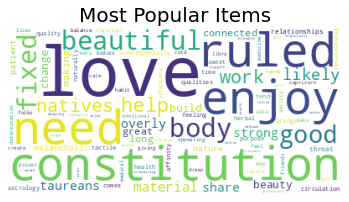

In [17]:
stop_words = text.ENGLISH_STOP_WORDS.union(stop_words_taurus)
vectorizer = TfidfVectorizer(stop_words=stop_words)
vecs = vectorizer.fit_transform(taurus_raw)
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
cloud_df = pd.DataFrame(lst1, columns=feature_names)
Cloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(cloud_df.T.sum(axis=1))

plt.imshow(Cloud)
plt.axis('off')
plt.title('Most Popular Items', fontsize = 20)
plt.show()

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


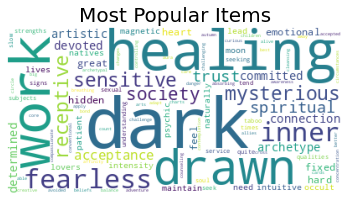

In [5]:
stop_words = text.ENGLISH_STOP_WORDS.union(stop_words_scorpio)
vectorizer = TfidfVectorizer(stop_words=stop_words)
vecs = vectorizer.fit_transform(scorpio_raw)
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst1 = dense.tolist()
cloud_df = pd.DataFrame(lst1, columns=feature_names)
Cloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(cloud_df.T.sum(axis=1))

plt.imshow(Cloud)
plt.axis('off')
plt.title('Most Popular Items', fontsize = 20)
plt.show()

In [6]:
df.head()

,sign,category,date,horoscope
0,aries,general,20200617,"There's a great day ahead of you, Aries. You'll be blessed with the ability to solve problems, and others will come looking for you today. You'll listen, understand, and express empathy. You'll be wise enough to find solutions to any issues they present to you. After a day like this, you might ask yourself if you shouldn't work as a therapist."
1,aries,general,20200618,"People will understand and appreciate your desire to stand out from the crowd today, Aries. This isn't a sign of arrogance on your part. It's just that you're particularly perceptive right now and people need your good advice. Since you're ready to step into the spotlight and shine like the stars that are giving you all this wonderful energy, go for it. You'd kick yourself if you let this opportunity pass."
2,aries,general,20200619,"You are very interested in technological breakthroughs and innovation, Aries, especially if it has some benefit for individuals. Since you also concern yourself with social issues and subjects like psychology and spiritual therapies, you realize the importance of progress in these areas for the future. You also wonder where you fit in."
3,aries,general,20200620,"Stress from overwork could have you feeling weaker than usual. You might be tempted to stay at home, get some rest, and recoup your energies. Do this if you can, Aries. Otherwise, you may not be able to give your project the concentration it needs, and therefore may not accomplish as much as you think you should. If you feel you can't stay home, try to work alone so you won't be distracted."
4,aries,general,20200621,"This is a good day to stand up for yourself and make it known that you aren't a pushover, Aries. Use the powerful energy of the day to follow through on projects that may have lost momentum. Pick up the reins and take control of the direction of your life. Feel free to be more aggressive than you normally would. Show others your incredible worth."


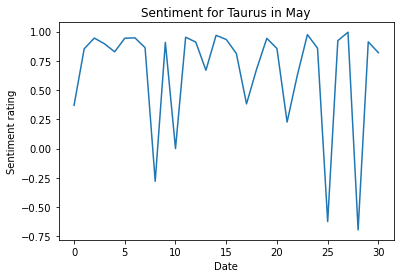

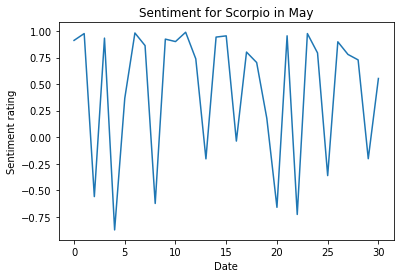

13132    Communication with friends and lovers may be limited by emotional factors today, Scorpio. You may have a tendency to overreact to casual comments that are probably innocent but that you misinterpret as offensive. Quarrels over nothing could result, which could raise your blood pressure and stress level for no good reason. If ever there was a day to think before speaking, this is it.
Name: horoscope, dtype: object
13139    You will feel especially close to family and friends today, Scorpio. There's a lot of positive energy in the air, and people feel optimistic and congenial. It's a pleasure to be with your loved ones, and interactions with strangers have a lovely flavor as well. Take advantage of the warm astral energy and plan a get-together with your favorite people. You will enjoy growing closer.
Name: horoscope, dtype: object
2176    Today a number of chores around the home could have you feeling overwhelmed, Taurus. Family members might abandon you, leaving you disgruntle

In [18]:
# !pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
analyzer = SentimentIntensityAnalyzer()


taurus_love = df[(df['sign'] == 'taurus') & (df['category'] == 'general') & (df['date'] > 20210430) & (df['date'] < 20210601)].sort_values(by='date')

vs_taurus = []
for i in range(taurus_love['date'].size):
    vs_taurus.append(analyzer.polarity_scores(taurus_love[i:i+1]['horoscope'])['compound'])


plt.plot(range(taurus_love['date'].size), vs_taurus)
plt.xlabel("Date")
plt.ylabel("Sentiment rating")
plt.title("Sentiment for Taurus in May")
plt.show()


scorpio_love = df[(df['sign'] == 'scorpio') & (df['category'] == 'general') & (df['date'] > 20210430) & (df['date'] < 20210601)].sort_values(by='date')

vs = []
for i in range(scorpio_love['date'].size):
    vs.append(analyzer.polarity_scores(scorpio_love[i:i+1]['horoscope'])['compound'])


plt.plot(range(scorpio_love['date'].size), vs)
plt.xlabel("Date")
plt.ylabel("Sentiment rating")
plt.title("Sentiment for Scorpio in May")
plt.show()

# See high vs. low
index_of_lowest_sentiment = np.argmin(np.array(vs))
low_sent = str(scorpio_love[index_of_lowest_sentiment:index_of_lowest_sentiment+1]['horoscope'])

index_of_high_sentiment = np.argmax(np.array(vs))
high_sent = str(scorpio_love[index_of_high_sentiment:index_of_high_sentiment+1]['horoscope'])
print(low_sent)
print(high_sent)

# See high vs. low
index_of_lowest_sentiment_taurus = np.argmin(np.array(vs_taurus))
low_sent_taurus = str(taurus_love[index_of_lowest_sentiment_taurus:index_of_lowest_sentiment_taurus+1]['horoscope'])

index_of_high_sentiment_taurus = np.argmax(np.array(vs_taurus))
high_sent_taurus = str(taurus_love[index_of_high_sentiment_taurus:index_of_high_sentiment_taurus+1]['horoscope'])
print(low_sent_taurus)
print(high_sent_taurus)

In [19]:
((df['date'] > 20200530) & (df['date'] < 20200701)).sum()

899